In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import glob
from bs4 import BeautifulSoup

In [ ]:
# glob.glob('filled/*')

In [6]:
def faire_graph(soupe:BeautifulSoup):
    df=pd.DataFrame([element for sousliste in [tag['who'].split(' ') for tag in soupe.find_all() if tag.has_attr('who')] for element in sousliste][6:], columns = ['pers'])

    plt.scatter(range(1,len(df)+1), df.pers, marker = "o", c=df.pers.apply(lambda x: sum([ord(l) for l in x])).to_list(), cmap='Paired')
    plt.plot(range(1,len(df)+1), df.pers, linewidth=1)
    plt.xticks(range(1,len(df)+1),range(1,len(df)+1))
    plt.title(soupe.find('title', attrs={"type": "sub"}).contents[0].strip())
    plt.xlabel('Interventions')
    plt.ylabel('Conseiller')
    plt.show()

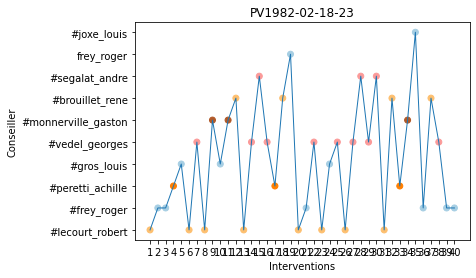

In [8]:
with open('filled/PV1982-02-18-23.xml', encoding='utf-8') as f:
    texte = f.read()

soup = BeautifulSoup(texte)

faire_graph(soup)